<a href="https://colab.research.google.com/github/dewipuspita0904/MembangunProyekMachineLearning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [73]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [74]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [75]:
#Pengecekan apakah dataset tersedia sebelum membaca data
file_path = "/content/CGPA_clustered.csv"

if os.path.exists(file_path):
    data_df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


In [76]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3023 non-null   int64  
 1   Prog Code  3023 non-null   object 
 2   Gender     3023 non-null   object 
 3   YoG        3023 non-null   int64  
 4   CGPA       3023 non-null   float64
 5   CGPA100    3023 non-null   float64
 6   CGPA200    3023 non-null   float64
 7   CGPA300    3023 non-null   float64
 8   CGPA400    3023 non-null   float64
 9   SGPA       3023 non-null   float64
 10  Cluster    3023 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 259.9+ KB


In [77]:
data_df.head(10)

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Cluster
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,3
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,0
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,0
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,1
5,51740,BCH,Male,2010,2.97,2.66,2.98,3.28,3.07,3.13,3
6,76075,BCH,Male,2010,3.34,3.68,3.00,3.44,3.28,3.02,3
7,60888,BCH,Female,2010,2.56,2.30,2.50,2.29,2.77,2.68,0
8,43378,BCH,Male,2010,3.76,3.30,3.64,3.88,4.37,3.13,1
9,80307,BCH,Female,2010,3.96,3.94,3.89,3.81,4.17,3.98,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [78]:
# Drop data kurang relevan
data_df = data_df.drop(columns=['ID No'])

In [79]:
# Drop data duplikat
data_df = data_df.drop_duplicates(ignore_index=True)

In [80]:
# Cek data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prog Code  3023 non-null   object 
 1   Gender     3023 non-null   object 
 2   YoG        3023 non-null   int64  
 3   CGPA       3023 non-null   float64
 4   CGPA100    3023 non-null   float64
 5   CGPA200    3023 non-null   float64
 6   CGPA300    3023 non-null   float64
 7   CGPA400    3023 non-null   float64
 8   SGPA       3023 non-null   float64
 9   Cluster    3023 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 236.3+ KB


In [81]:
# Pisahkan fitur dan target
X = data_df.drop(columns=['Cluster'])
y = data_df['Cluster']

X.head()

,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


In [82]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

In [83]:
# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,ICE,Female,0.0,0.492795,0.351682,0.603133,0.412346,0.430894,0.481268
1,BCH,Female,0.0,0.593660,0.464832,0.806789,0.597531,0.585366,0.449568
2,BCH,Male,0.0,0.198847,0.015291,0.211488,0.133333,0.325203,0.210375
3,BCH,Male,0.0,0.340058,0.287462,0.331593,0.259259,0.281843,0.498559
4,BCH,Female,0.0,0.680115,0.574924,0.657963,0.661728,0.886179,0.801153


In [84]:
# Buat instance LabelEncoder
encoder = LabelEncoder()

In [85]:
# Encoding pada kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

X.head()

,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,8,0,0.0,0.492795,0.351682,0.603133,0.412346,0.430894,0.481268
1,0,0,0.0,0.593660,0.464832,0.806789,0.597531,0.585366,0.449568
2,0,1,0.0,0.198847,0.015291,0.211488,0.133333,0.325203,0.210375
3,0,1,0.0,0.340058,0.287462,0.331593,0.259259,0.281843,0.498559
4,0,0,0.0,0.680115,0.574924,0.657963,0.661728,0.886179,0.801153


In [86]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("Ukuran Data Latih:", X_train.shape, y_train.shape)
print("Ukuran Data Uji:", X_test.shape, y_test.shape)

Ukuran Data Latih: (2418, 9) (2418,)
Ukuran Data Uji: (605, 9) (605,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [88]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

In [89]:
# Mendefinisikan model klasifikasi
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()

In [90]:
# Melatih model dengan data latih
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
# Latih dan evaluasi setiap model
results = {}

for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Evaluasi akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Akurasi = {accuracy:.4f}")

Logistic Regression: Akurasi = 0.9306
Random Forest: Akurasi = 0.9421


In [92]:
# Tampilkan hasil
print("\nHasil Evaluasi Model:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Hasil Evaluasi Model:
Logistic Regression: 0.9306
Random Forest: 0.9421


###**Logistic Regression**
**Kegunaan**: Logistic Regression sering digunakan sebagai model dasar dalam klasifikasi biner karena kesederhanaannya dan interpretabilitasnya yang tinggi.

**Kelebihan**: Mudah dipahami, cepat, dan cocok untuk data yang memiliki hubungan linear antara variabel independen dan target.

**Kekurangan**: Tidak bekerja dengan baik jika hubungan antara fitur dan target bersifat non-linear.



###**Random Forest**
**Kegunaan**: Random Forest adalah ensemble dari banyak Decision Tree yang bekerja bersama untuk meningkatkan akurasi prediksi dan mengurangi overfitting.

**Kelebihan**: Lebih akurat dibandingkan Decision Tree tunggal, lebih tahan terhadap outlier, dan bekerja dengan baik pada dataset yang kompleks.

**Kekurangan**: Lebih lambat dibandingkan dengan model sederhana seperti Logistic Regression, karena terdiri dari banyak pohon keputusan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [93]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [94]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f" Evaluasi Model: {model_name}")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print("-" * 50)

In [95]:
# Evaluasi semua model
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

 Evaluasi Model: Logistic Regression
   - Accuracy: 0.9306
   - Precision: 0.9329
   - Recall: 0.9306
   - F1-Score: 0.9310
--------------------------------------------------
 Evaluasi Model: Random Forest
   - Accuracy: 0.9455
   - Precision: 0.9460
   - Recall: 0.9455
   - F1-Score: 0.9455
--------------------------------------------------


In [96]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

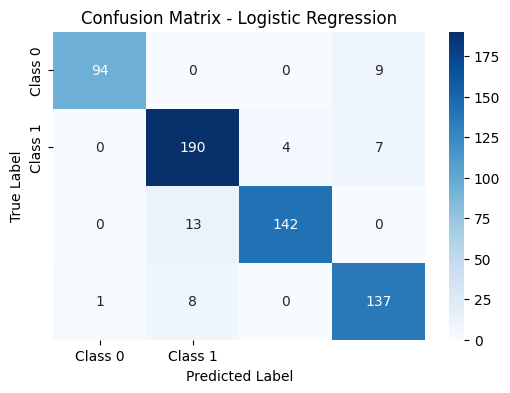

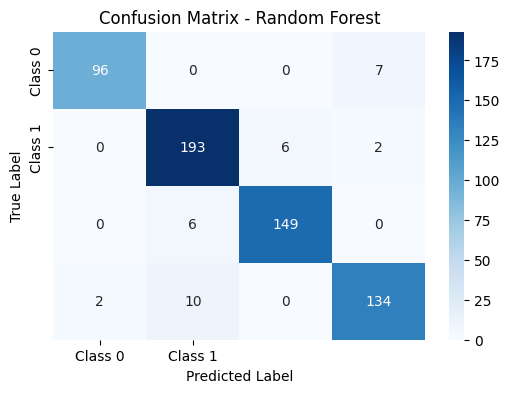

In [97]:
# Tampilkan Confusion Matrix untuk setiap model
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

### Evaluasi Logistic Regression
- Accuracy: 93.06%
- Precision: 93.29%
- Recall: 93.06%
- F1-Score: 93.10%

**Analisis**:
- Logistic Regression menunjukkan performa yang cukup baik dengan akurasi 93.06%.
- Precision yang tinggi (93.29%) menunjukkan bahwa model jarang menghasilkan false positive.
- Recall yang juga tinggi (93.06%) menunjukkan bahwa model mampu menangkap mayoritas kasus positif dengan baik.
- F1-Score (93.10%) mengindikasikan keseimbangan antara Precision dan Recall.

Model ini cocok digunakan jika interpretabilitas penting karena Logistic Regression bersifat linear dan mudah dipahami.


### Evaluasi Random Forest
- Accuracy: 94.55%
- Precision: 94.60%
- Recall: 94.55%
- F1-Score: 94.55%

**Analisis**:
- Random Forest menunjukkan performa lebih baik dibandingkan Logistic Regression, dengan akurasi lebih tinggi (94.55%).
- Precision (94.60%) sedikit lebih baik, menunjukkan lebih sedikit false positive dibandingkan Logistic Regression.
- Recall juga lebih tinggi (94.55%), menunjukkan bahwa model ini lebih baik dalam menangkap semua kasus positif.
- F1-Score (94.55%) menunjukkan keseimbangan yang sangat baik antara Precision dan Recall.

Random Forest lebih kuat dalam menangani fitur non-linear dan interaksi antar fitur, serta lebih robust terhadap outlier dan missing values.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [98]:
# Tentukan hyperparameter yang akan diuji
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

In [99]:
# Inisialisasi model
logreg = LogisticRegression(max_iter=1000)

In [100]:
# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hasil tuning terbaik
best_logreg = grid_search.best_estimator_
print("Best parameters for Logistic Regression:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best accuracy: 0.9859410023441644


In [101]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [102]:
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best parameters for Random Forest:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best accuracy: 0.9383826976712353


In [103]:
# Membandingkan hasil tuning
print(f"Logistic Regression Best Accuracy: {grid_search.best_score_:.4f}")
print(f"Random Forest Best Accuracy: {random_search.best_score_:.4f}")

Logistic Regression Best Accuracy: 0.9859
Random Forest Best Accuracy: 0.9384


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [104]:
# List model terbaik setelah tuning
best_models = {
    'Logistic Regression': best_logreg,
    'Random Forest': best_rf,
}

In [105]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

In [106]:
# Evaluasi setiap model
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Simpan hasil evaluasi
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Print hasil evaluasi per model
    print(f" Evaluasi Model: {name}")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print("--------------------------------------------------\n")

 Evaluasi Model: Logistic Regression
   - Accuracy: 0.9851
   - Precision: 0.9876
   - Recall: 0.9851
   - F1-Score: 0.9863
--------------------------------------------------

 Evaluasi Model: Random Forest
   - Accuracy: 0.9388
   - Precision: 0.9430
   - Recall: 0.9385
   - F1-Score: 0.9405
--------------------------------------------------



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Perbandingan Sebelum & Setelah Tuning
Setelah melakukan tuning, terjadi perubahan signifikan dalam performa kedua model. Berikut analisa perbandingan sebelum dan setelah tuning, kelemahan model, serta rekomendasi tindakan lanjutan lainnya.

**Perbandingan hasil sebelum dan setelah tuning**:
- Logistic Regression meningkat secara signifikan setelah tuning, dengan akurasi mencapai 98.51%. Semua metrik evaluasi juga mengalami peningkatan yang cukup besar.
- Random Forest mengalami sedikit penurunan pada semua metrik evaluasi setelah tuning. Ini bisa terjadi karena tuning yang dilakukan tidak optimal atau model mengalami overfitting pada data latih dan tidak mampu melakukan generalisasi dengan baik.

**Identifikasi kelemahan model**:
- Logistic Regression menunjukkan performa sangat tinggi setelah tuning, yang bisa menjadi indikasi overfitting jika hasil pada data uji jauh lebih rendah dibanding data latih.
- Random Forest justru mengalami sedikit penurunan, yang bisa terjadi karena parameter tuning yang tidak sesuai, seperti jumlah pohon terlalu sedikit atau pembatasan kedalaman pohon yang terlalu ketat.
- Jika precision lebih rendah dari recall, berarti model cenderung memprediksi kelas positif terlalu sering, menyebabkan false positives lebih banyak.
- Jika recall lebih rendah dari precision, berarti model cenderung kurang menangkap kelas positif, menyebabkan false negatives lebih banyak.
- Berdasarkan hasil tuning, precision dan recall meningkat secara seimbang pada Logistic Regression, menunjukkan keseimbangan prediksi antara kelas positif dan negatif.

**Rekomendasi tindakan lanjutan**:

***Untuk Logistic Regression***
- Validasi Model dengan data baru atau data uji untuk memastikan tidak terjadi overfitting.
- Evaluasi dengan metode lain, seperti cross-validation untuk melihat apakah hasil tetap konsisten di berbagai subset data.
- Jika model masih overfitting, pertimbangkan untuk mengurangi jumlah fitur (feature selection) atau menambahkan regularisasi (L1/L2).

***Untuk Random Forest***:
- Cek tuning parameter dan coba perbaiki dengan menambah jumlah pohon (n_estimators) untuk meningkatkan stabilitas model, meningkatkan kedalaman maksimum (max_depth) jika model terlalu dibatasi, dan menguji jumlah fitur yang digunakan di setiap split (max_features) untuk menghindari penurunan performa.